In [1]:
from constants import *
from model_manager import section1, section2, single_model

Num GPUs Available:  1


In [2]:
main_folder = "H:\\aless\\Documents\\Python_Scripts\\Matur\\matura-private-main\\matura-private-1\\results1\\"

In [3]:
import numpy as np
import tensorflow as tf

def get_metrics(model):
    y_pred = model.model.evaluate(model.val_dataset)


    y_labels = []
    for batch in model.val_dataset.take(-1):
        _, coords_batch = batch
        coords_batch = coords_batch.numpy()
        y_labels.append(coords_batch)

    y_labels = np.array(y_labels)
    y_true = y_labels.reshape(-1, y_labels.shape[2])

    # Calculate additional metrics
    # Mean Absolute Error (MAE)
    mae_metric = tf.keras.losses.MeanAbsoluteError()
    mae_value = mae_metric(y_true, y_pred).numpy()
    print("Mean Absolute Error (MAE):", mae_value)

    # Categorical Crossentropy
    crossentropy_metric = tf.keras.losses.CategoricalCrossentropy()
    crossentropy_value = crossentropy_metric(y_true, y_pred).numpy()
    print("Categorical Crossentropy:", crossentropy_value)

    # Accuracy (for classification problems)
    # Convert predictions and true labels to class indices
    y_true_classes = np.argmax(y_true, axis=1)
    y_pred_classes = np.argmax(y_pred, axis=1)
    accuracy = np.mean(y_true_classes == y_pred_classes)
    print("Accuracy:", accuracy)
    return mae_value, crossentropy_value, accuracy

In [4]:
def transform_params(params):
    """Transform the parameters to match the desired structure."""
    best_conv = [param for key, param in params.items() if key.startswith('conv')]
    best_dense = [param for key, param in params.items() if key.startswith('dense')]

    # Pass the rest of the parameters unchanged, and only modify conv and dense layers
    params['conv_layers'] = best_conv
    params['dense_layers'] = best_dense
    return params

Initialising data and model...
model compiled with params: {'num_conv_layers': 5, 'num_dense_layers': 1, 'conv_0_size': 4, 'conv_1_size': 8, 'conv_2_size': 24, 'conv_3_size': 175, 'conv_4_size': 147, 'dense_0_size': 210, 'flatten_type': 'global_average', 'activation': 'relu', 'optimizer': 'adam', 'conv_layers': [4, 8, 24, 175, 147], 'dense_layers': [210], 'learning_rate': 0.001, 'dropout': 0.01}


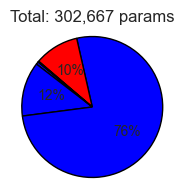

Epoch 1 / 10 - loss: 58.8278 - mean_absolute_error: 4.2462 - val_loss: 6.9525 - val_mean_absolute_error: 1.9596 - 
Target MAE of 5 reached! Stopping training.



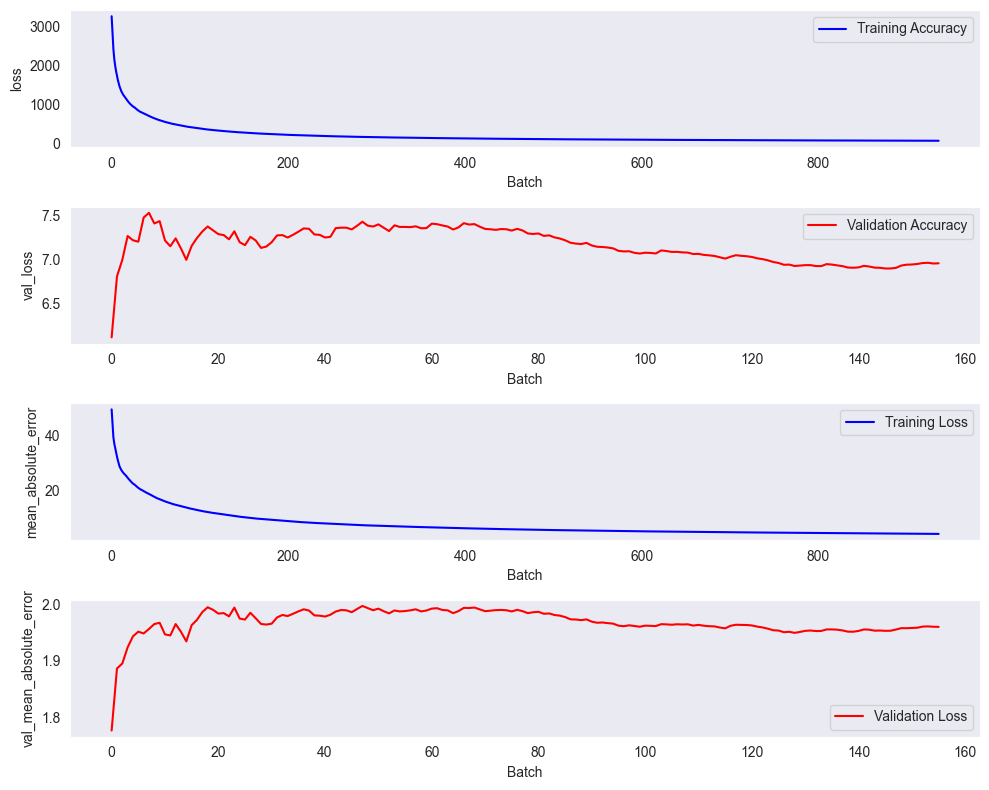

156/156 [==============================] - 1s 6ms/step
Mean Absolute Error (MAE): 1.3440937
Categorical Crossentropy: 58.112225
Accuracy: 0.9856770833333334


(1.3440937, 58.112225, 0.9856770833333334)

In [5]:
model = section1()
params= {
            "num_conv_layers": 5,
            "num_dense_layers": 1,
            "conv_0_size": 4,
            "conv_1_size": 8,
            "conv_2_size": 24,
            "conv_3_size": 175,
            "conv_4_size": 147,
            "dense_0_size": 210,
            "flatten_type": "global_average",
            "activation": "relu",
            "optimizer": "adam"
        }

params = transform_params(params)

model.initialise_data_and_model(params)
params2 = {
    "stop_at": 5,
    "show_progress": True,
}
model.train(params=params2)
model.plot()
model.model.load_weights(main_folder + "best_sect1.weights.h5")
get_metrics(model)

model compiled with params: {'num_conv_layers': 3, 'num_dense_layers': 2, 'conv_0_size': 4, 'conv_1_size': 28, 'conv_2_size': 26, 'dense_0_size': 171, 'dense_1_size': 180, 'flatten_type': 'global_average', 'activation': 'relu', 'optimizer': 'adam', 'conv_layers': [4, 28, 26], 'dense_layers': [171, 180], 'learning_rate': 0.001, 'dropout': 0.01}


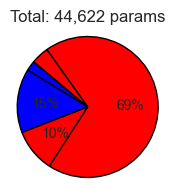

156/156 [==============================] - 0s 1ms/step
Mean Absolute Error (MAE): 0.05835324
Categorical Crossentropy: 1.0709516
Accuracy: 0.7358774038461539


(0.05835324, 1.0709516, 0.7358774038461539)

In [ ]:
model = section2()
params={
            "num_conv_layers": 3,
            "num_dense_layers": 2,
            "conv_0_size": 4,
            "conv_1_size": 28,
            "conv_2_size": 26,
            "dense_0_size": 171,
            "dense_1_size": 180,
            "flatten_type": "global_average",
            "activation": "relu",
            "optimizer": "adam"
        }

params = transform_params(params)

model.initialise_data_and_model(params)
params2 = {
    "stop_at": 0.9,
    "show_progress": True,
}
model.train(params=params2)
model.plot()
#model.model.load_weights(main_folder + "best_sect2.weights.h5")
get_metrics(model)

model compiled with params: {'num_conv_layers': 5, 'num_dense_layers': 1, 'conv_0_size': 4, 'conv_1_size': 18, 'conv_2_size': 19, 'conv_3_size': 39, 'conv_4_size': 49, 'dense_0_size': 71, 'flatten_type': 'global_average', 'activation': 'relu', 'optimizer': 'adam', 'conv_layers': [4, 18, 19, 39, 49], 'dense_layers': [71], 'learning_rate': 0.001, 'dropout': 0.01}


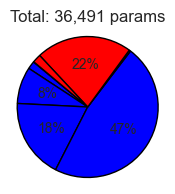

Epoch 1 / 10 - loss: 1.0392 - accuracy: 0.6782 - val_loss: 0.3094 - val_accuracy: 0.9074 - 
Target accuracy of 0.9 reached! Stopping training.



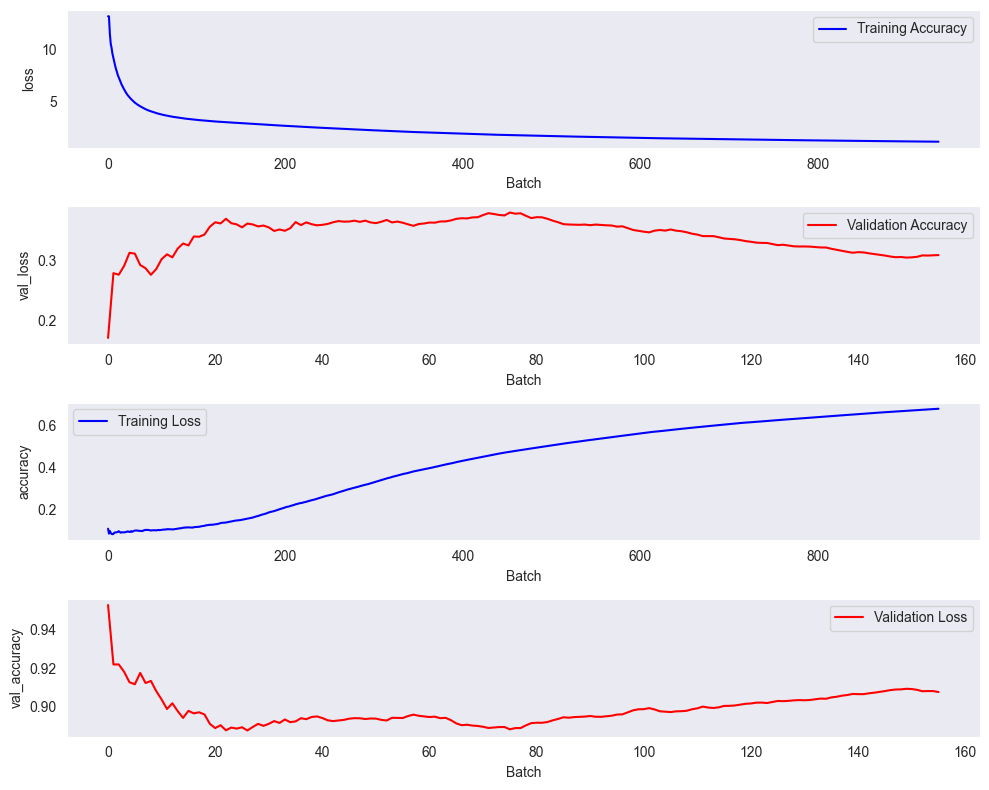

156/156 [==============================] - 1s 6ms/step
Mean Absolute Error (MAE): 0.025844187
Categorical Crossentropy: 0.29004112
Accuracy: 0.9139623397435898


(0.025844187, 0.29004112, 0.9139623397435898)

In [7]:
model = single_model()
params={
            "num_conv_layers": 5,
            "num_dense_layers": 1,
            "conv_0_size": 4,
            "conv_1_size": 18,
            "conv_2_size": 19,
            "conv_3_size": 39,
            "conv_4_size": 49,
            "dense_0_size": 71,
            "flatten_type": "global_average",
            "activation": "relu",
            "optimizer": "adam"
        }

params = transform_params(params)

model.initialise_data_and_model(params)
params2 = {
    "stop_at": 0.9,
    "show_progress": True,
}
model.train(params=params2)
model.plot()
model.model.load_weights(main_folder + "best_single.weights.h5")
get_metrics(model)